In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/2024fall/BME574/BME574_codes`


In [2]:
Pkg.instantiate()

In [3]:
using Distributions, Random, LinearAlgebra, Plots

In [4]:
nd = Normal(0,1)
data = rand(nd, (1000,2))

1000×2 Matrix{Float64}:
 -1.30042    -1.13791
 -2.13307     0.837106
 -1.41589    -1.26825
 -0.325012    1.96671
  1.32083     0.171935
  1.81053    -0.67117
  0.480219   -0.850919
  1.6175      0.675256
  0.961221    0.641263
 -0.234684    0.0709316
  1.09657     0.0881377
  0.439227   -0.253697
 -0.165708    1.94958
  ⋮          
  0.272655    0.907434
  0.564041   -0.289627
  0.248171   -0.345857
  0.746957   -0.070472
  2.2874     -0.856177
  0.0859365  -0.146327
  1.64904     0.601265
  0.535319    0.00778019
 -0.480652    0.307257
  1.13386     0.864343
 -1.3007      1.18706
 -0.101106    0.73753

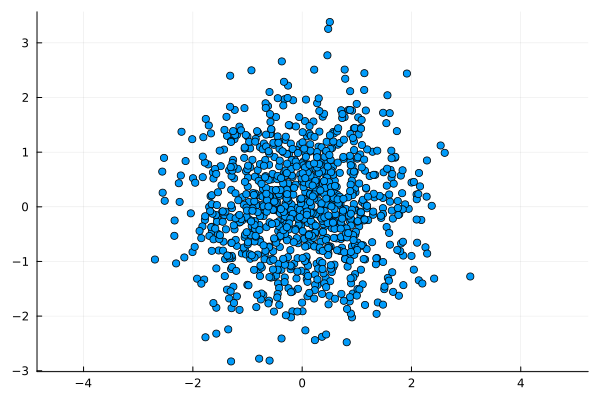

In [5]:
scatter(data[:,1], data[:,2], aspect_ratio = :equal, legend = nothing)

In [6]:
datas = copy(data)
datas[:,2] = datas[:,2]*3

1000-element Vector{Float64}:
 -3.413742851820519
  2.511318212624055
 -3.804748038196518
  5.9001228169243465
  0.5158057373874377
 -2.013509369304372
 -2.552756729798253
  2.0257668109070073
  1.9237888079813965
  0.21279490431214526
  0.2644129719579751
 -0.7610914348212675
  5.848739340209619
  ⋮
  2.722303005935358
 -0.8688822350170918
 -1.037570424233884
 -0.2114158851629624
 -2.568530105185396
 -0.4389810312835795
  1.8037958127065126
  0.023340563208445013
  0.9217695220776696
  2.593028185458838
  3.5611899561883904
  2.2125901189917245

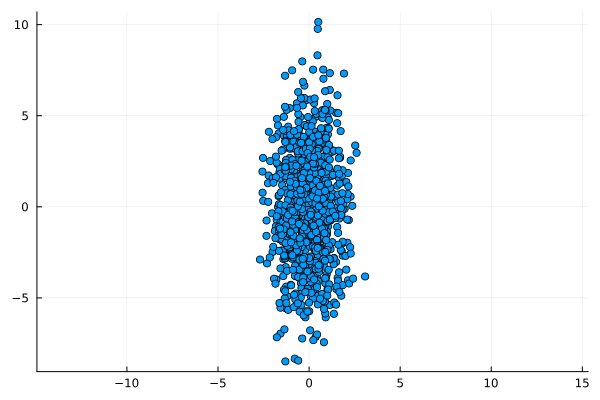

In [7]:
scatter(datas[:,1], datas[:,2], aspect_ratio = :equal, legend = nothing)

In [8]:
θ = π/4
r = [[cos(θ), -sin(θ)] [sin(θ), cos(θ)]]

2×2 Matrix{Float64}:
  0.707107  0.707107
 -0.707107  0.707107

In [9]:
datar = datas*r

1000×2 Matrix{Float64}:
  1.49434   -3.33342
 -3.28408    0.267463
  1.68918   -3.69155
 -4.40184    3.9422
  0.569236   1.2987
  2.70401   -0.143527
  2.14464   -1.46551
 -0.288687   2.57618
 -0.680638   2.04001
 -0.316415  -0.0154777
  0.588426   0.962363
  0.848754  -0.227592
 -4.25286    4.01851
  ⋮         
 -1.73216    2.11776
  1.01323   -0.215556
  0.909156  -0.55819
  0.677672   0.378685
  3.43366   -0.198786
  0.371173  -0.24964
 -0.109427   2.44153
  0.362024   0.395032
 -0.991662   0.311917
 -1.03179    2.63531
 -3.43788    1.59841
 -1.63603    1.49304

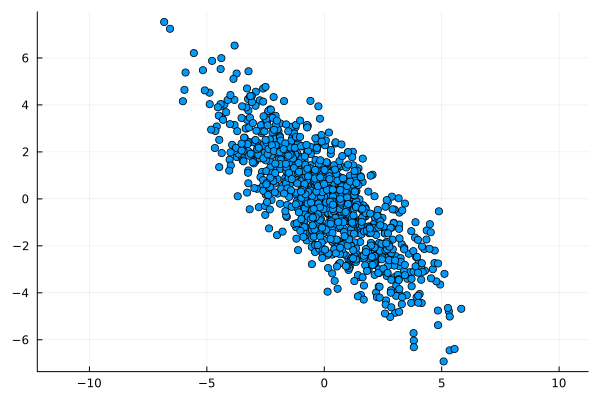

In [10]:
scatter(datar[:,1], datar[:,2], aspect_ratio = :equal, legend = nothing)

In [11]:
# Step 1, translate the streched and rotated matrix by delta x = 1 and delta y = 1
∆x = 1
∆y = 1
datat = datar .+ [∆x ∆y]

1000×2 Matrix{Float64}:
  2.49434     -2.33342
 -2.28408      1.26746
  2.68918     -2.69155
 -3.40184      4.9422
  1.56924      2.2987
  3.70401      0.856473
  3.14464     -0.465506
  0.711313     3.57618
  0.319362     3.04001
  0.683585     0.984522
  1.58843      1.96236
  1.84875      0.772408
 -3.25286      5.01851
  ⋮           
 -0.732163     3.11776
  2.01323      0.784444
  1.90916      0.44181
  1.67767      1.37868
  4.43366      0.801214
  1.37117      0.75036
  0.890573     3.44153
  1.36202      1.39503
  0.00833789   1.31192
 -0.031789     3.63531
 -2.43788      2.59841
 -0.63603      2.49304

In [12]:
# Step 2, subtract the mean
datac = datat .- mean(datat, dims=1)

1000×2 Matrix{Float64}:
  1.49939   -3.31479
 -3.27903    0.286087
  1.69423   -3.67292
 -4.39679    3.96082
  0.574286   1.31732
  2.70905   -0.124903
  2.14969   -1.44688
 -0.283637   2.5948
 -0.675589   2.05863
 -0.311366   0.0031468
  0.593476   0.980987
  0.853803  -0.208968
 -4.24781    4.03713
  ⋮         
 -1.72711    2.13638
  1.01828   -0.196931
  0.914206  -0.539566
  0.682722   0.397309
  3.43871   -0.180161
  0.376222  -0.231016
 -0.104378   2.46015
  0.367073   0.413657
 -0.986613   0.330541
 -1.02674    2.65393
 -3.43283    1.61703
 -1.63098    1.51167

In [13]:
# Step 3, apply PCA using SVD
u,s,v = svd(datac/sqrt(1000))

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
1000×2 Matrix{Float64}:
 -0.0371596    -0.0411349
  0.0273251    -0.069347
 -0.0414257    -0.044819
  0.0643506    -0.0111443
  0.00580707    0.0434302
 -0.021712      0.0598428
 -0.0276693     0.0166513
  0.0222726     0.0528009
  0.0211205     0.0314624
  0.00240864   -0.00713449
  0.00305472    0.0361795
 -0.00815671    0.0149802
  0.063801     -0.00595035
  ⋮            
  0.0297747     0.00890383
 -0.00932293    0.0190623
 -0.0111802     0.00881454
 -0.00215014    0.0248913
 -0.0277273     0.0754663
 -0.00467046    0.00342225
  0.0198568     0.053869
  0.000393555   0.0179597
  0.0101155    -0.0152726
  0.0284209     0.0369547
  0.038813     -0.0424565
  0.0241993    -0.00316373
singular values:
2-element Vector{Float64}:
 2.903194401925156
 0.9716932831304529
Vt factor:
2×2 Matrix{Float64}:
 -0.703006  0.711184
  0.711184  0.703006

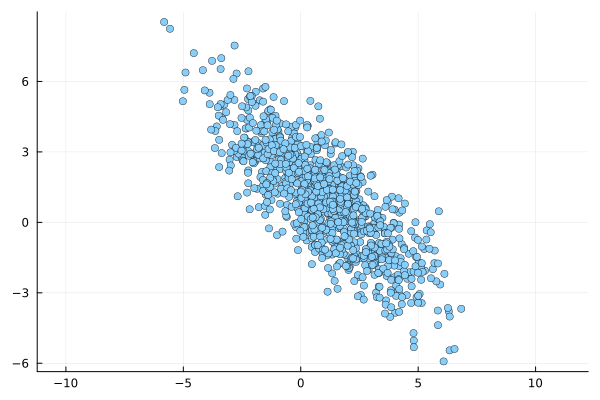

In [14]:
# Step 4, plot the original (befor mean substraction) distribution
scatter(datat[:,1], datat[:,2], 
    aspect_ratio = :equal, legend = nothing, color=:lightskyblue, label = "Data", markerstrokewidth=0.5)

In [15]:
theta_vals = range(0, 2π, length=1000)
data_std = [cos.(theta_vals) sin.(theta_vals)] * Diagonal(s)*v'

1000×2 Matrix{Float64}:
 -2.04096  2.0647
 -2.03658  2.06896
 -2.03211  2.07313
 -2.02756  2.07723
 -2.02293  2.08123
 -2.01823  2.08516
 -2.01344  2.08901
 -2.00857  2.09277
 -2.00362  2.09645
 -1.9986   2.10004
 -1.99349  2.10356
 -1.98831  2.10699
 -1.98305  2.11033
  ⋮        
 -2.08385  2.01254
 -2.08036  2.01769
 -2.07679  2.02275
 -2.07314  2.02773
 -2.0694   2.03264
 -2.06558  2.03746
 -2.06168  2.04221
 -2.0577   2.04687
 -2.05364  2.05145
 -2.04949  2.05595
 -2.04527  2.06037
 -2.04096  2.0647

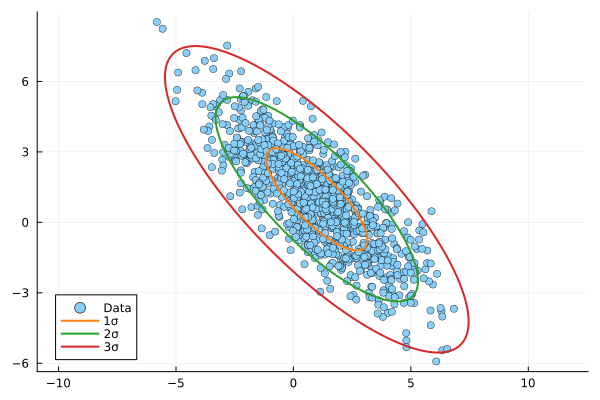

In [16]:
data_average = mean(datat, dims=1)

for i in range(1,3)
    plot!(data_average[1] .+ data_std[:,1].*i, data_average[2] .+ data_std[:,2].*i, linewidth=2, label="$(i)σ", palette=:tab10)
end

# plot!(data_average[1] .+ data_std[:,1], data_average[2] .+ data_std[:,2], color=:red, linewidth=2, label="1σ")
# plot!(data_average[1] .+ data_std[:,1].*2, data_average[2] .+ data_std[:,2].*2, color=:red, linewidth=2, label="2σ")
# plot!(data_average[1] .+ data_std[:,1].*3, data_average[2] .+ data_std[:,2].*3, color=:red, linewidth=2, label = "3σ")
plot!(legend=:bottomleft)

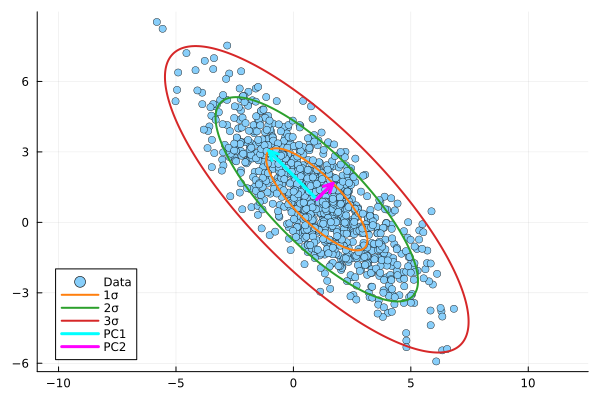

In [17]:
# principal directions
principal_direc1 = v[:,1]*s[1];
principal_direc2 = v[:,2]*s[2];
plot!([data_average[1], data_average[1]+principal_direc1[1]], [data_average[2], data_average[2]+principal_direc1[2]], 
    arrow=:arrow, linewidth=3, label="PC1", color=:cyan)
plot!([data_average[1], data_average[1]+principal_direc2[1]], [data_average[2], data_average[2]+principal_direc2[2]], 
    arrow=:arrow, linewidth=3, label="PC2", color=:fuchsia)